In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Parameters. Check our sketch to identify labels a2,a3,d1,d3
a2 = 0.3     # link 2 length [m]
a3 = 0.3     # link 3 length [m]
d1 = 0.2
d3_min, d3_max = 0.0, 0.5   # prismatic range [m]
deg2rad = np.pi/180

In [30]:
# Joint limits
theta1 = np.linspace(-180, 180, 30) * deg2rad
theta2 = np.linspace(-90, 90, 30) * deg2rad
theta3 = np.linspace(-135, 135, 30) * deg2rad
theta4 = theta3
d3_vals = np.linspace(d3_min, d3_max, 5)

In [31]:
# Forward Kinematics
#I am taking only the translation column of the homogenous matrix
def conventional3R(theta1, theta2, theta3, d1, a2, a3):
    x = np.cos(theta1) * (a3*np.cos(theta2+theta3) + a2*np.cos(theta2))
    y = np.sin(theta1) * (a3*np.cos(theta2+theta3) + a2*np.cos(theta2))  
    z = d1 + a3*np.sin(theta2+theta3) + a2*np.sin(theta2)
    return x, y, z 

def ReConARM_matrix(theta1, theta2, theta4, d1, d3, a3):
    x = -np.cos(theta1) * (a3*np.cos(theta2+theta4) - d3*np.sin(theta2))
    y = -np.sin(theta1) * (a3*np.cos(theta2+theta4) - d3*np.sin(theta2))
    z = d1 - a3*np.sin(theta2+theta4) - d3*np.cos(theta2)
    return x, y, z

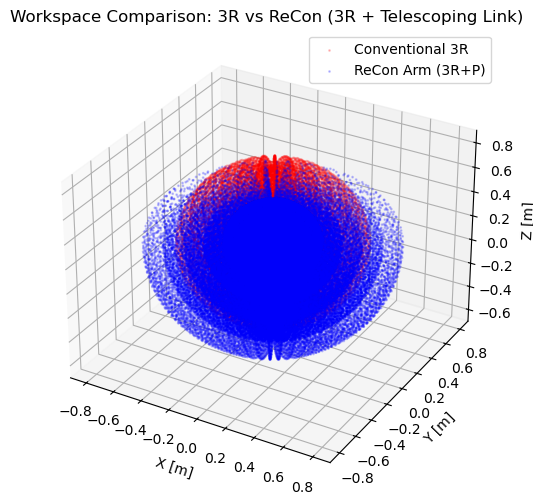

In [32]:
# Creating the workspace data needed to make the plot
X_3R, Y_3R, Z_3R = [], [], []
X_ReCon, Y_ReCon, Z_ReCon = [], [], []

for t1 in theta1:
    for t2 in theta2:
        for t3 in theta3:
            x, y, z = conventional3R(t1, t2, t3, d1, a2, a3)
            X_3R.append(x); Y_3R.append(y); Z_3R.append(z)
           
for t1 in theta1:
    for t2 in theta2:
        for t4 in theta4:
            for d3 in d3_vals:
                x2, y2, z2 = ReConARM_matrix(t1, t2, t4, d1, d3, a3)
                X_ReCon.append(x2); Y_ReCon.append(y2); Z_ReCon.append(z2)

# Plotting workspace (I used 3D Scatterplot but we can try something else)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3R, Y_3R, Z_3R, s=1, color='red', alpha=0.2, label='Conventional 3R')
ax.scatter(X_ReCon, Y_ReCon, Z_ReCon, s=1, color='blue', alpha=0.2, label='ReCon Arm (3R+P)')

ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.set_title('Workspace Comparison: 3R vs ReCon (3R + Telescoping Link)')
ax.legend()
plt.show()